# Machine Learning Week 5
Azmi Taqiuddin Syah Tk4505 1103213078

pandas as pd: Library untuk manipulasi dan analisis data dalam format tabel/dataframe

numpy as np: Library untuk komputasi numerik dan operasi matematika

matplotlib.pyplot as plt: Library untuk membuat visualisasi data dalam bentuk plot/grafik

seaborn as sns: Library untuk membuat visualisasi data statistik yang lebih menarik, berbasis matplotlib

Dari sklearn (scikit-learn) diimport beberapa modul:

train_test_split: Untuk membagi data menjadi data training dan testing
LinearRegression: Untuk membuat model regresi linear
mean_squared_error, r2_score: Metrik evaluasi untuk mengukur performa model regresi
Kode ini biasanya digunakan di awal project machine learning untuk menyiapkan tools yang diperlukan dalam pengolahan data, visualisasi, pembuatan model prediksi, dan evaluasi model

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

Baris kode ini membaca file bernama 'data.csv' dan menyimpan isinya ke dalam sebuah DataFrame pandas yang diberi nama 'df'. DataFrame adalah struktur data dua dimensi (mirip tabel) yang memudahkan kita untuk melakukan analisis dan manipulasi data. Dengan menggunakan fungsi pd.read_csv()

In [3]:
df = pd.read_csv('data.csv')

Baris kode ini membaca data.csv dalam bentuk 5 baris dari atas

In [4]:
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


# Mengeksplor datasetnya

Kode df.shape adalah perintah untuk menampilkan dimensi atau ukuran dari DataFrame

In [5]:
df.shape

(11914, 16)

Fungsi df.describe() menghasilkan tabel ringkasan statistik untuk kolom-kolom numerik dalam DataFrame

In [6]:
df.describe()

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP
count,11914.000000,11845.00000,11884.000000,11908.000000,11914.000000,11914.000000,11914.000000,1.191400e+04
mean,2010.384338,249.38607,5.628829,3.436093,26.637485,19.733255,1554.911197,4.059474e+04
std,7.579740,109.19187,1.780559,0.881315,8.863001,8.987798,1441.855347,6.010910e+04
min,1990.000000,55.00000,0.000000,2.000000,12.000000,7.000000,2.000000,2.000000e+03
25%,2007.000000,170.00000,4.000000,2.000000,22.000000,16.000000,549.000000,2.100000e+04
50%,2015.000000,227.00000,6.000000,4.000000,26.000000,18.000000,1385.000000,2.999500e+04
75%,2016.000000,300.00000,6.000000,4.000000,30.000000,22.000000,2009.000000,4.223125e+04
max,2017.000000,1001.00000,16.000000,4.000000,354.000000,137.000000,5657.000000,2.065902e+06


Perintah df.info() menampilkan ringkasan informasi tentang DataFrame

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

Perintah df.dtypes menampilkan daftar tipe data untuk setiap kolom dalam DataFrame

In [8]:
df.dtypes

Make                  object
Model                 object
Year                   int64
Engine Fuel Type      object
Engine HP            float64
Engine Cylinders     float64
Transmission Type     object
Driven_Wheels         object
Number of Doors      float64
Market Category       object
Vehicle Size          object
Vehicle Style         object
highway MPG            int64
city mpg               int64
Popularity             int64
MSRP                   int64
dtype: object

Perintah ini mengubah nama kolom-kolom dalam DataFrame dari bahasa Inggris ke bahasa Indonesia/nama yang lebih mudah dipahami

Parameter inplace=True berarti perubahan langsung diterapkan ke DataFrame asli tanpa perlu reassignment.

In [9]:
df.rename(columns={
    'Make': 'Merk',
    'Engine Fuel Type': 'BahanBakar',
    'Engine HP': 'Tenaga',
    'Engine Cylinders': 'Silinder',
    'Transmission Type': 'Transmissi',
    'Driven_Wheels': 'TipeKopling',
    'Number of Doors': 'JumlahPintu',
    'Market Category': 'SalesPenjualan',
    'Vehicle Size': 'BesarKendaraan',
    'Vehicle Style': 'StyleKendaraan',
    'highway MPG': 'Highway',
    'city mpg': 'city_mpg',
    'MSRP': 'Harga'
}, inplace=True)

In [10]:
df.head()

,Merk,Model,Year,BahanBakar,Tenaga,Silinder,Transmissi,TipeKopling,JumlahPintu,SalesPenjualan,BesarKendaraan,StyleKendaraan,Highway,city_mpg,Popularity,Harga
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


Perintah df.columns akan menampilkan daftar nama-nama kolom yang ada dalam DataFrame setelah dilakukan perubahan nama menggunakan rename()

In [11]:
df.columns

Index(['Merk', 'Model', 'Year', 'BahanBakar', 'Tenaga', 'Silinder',
       'Transmissi', 'TipeKopling', 'JumlahPintu', 'SalesPenjualan',
       'BesarKendaraan', 'StyleKendaraan', 'Highway', 'city_mpg', 'Popularity',
       'Harga'],
      dtype='object')

mengkategorikan kolom-kolom dalam DataFrame berdasarkan tipe datanya

Numerical Columns: Ini adalah daftar kolom dengan tipe data numerik (int64 atau float64)

Categorical Columns: Ini adalah daftar kolom dengan tipe data object

Memahami struktur data
Mempersiapkan data untuk analisis atau pemodelan
Menentukan preprocessing yang sesuai untuk setiap jenis kolom

In [12]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
other_cols = df.select_dtypes(exclude=['int64', 'float64', 'object']).columns.tolist()

# Output the classified columns
print("Numerical Columns:", numerical_cols)
print("Categorical Columns:", categorical_cols)
print("Other Columns (e.g., DateTime):", other_cols)

Numerical Columns: ['Year', 'Tenaga', 'Silinder', 'JumlahPintu', 'Highway', 'city_mpg', 'Popularity', 'Harga']
Categorical Columns: ['Merk', 'Model', 'BahanBakar', 'Transmissi', 'TipeKopling', 'SalesPenjualan', 'BesarKendaraan', 'StyleKendaraan']
Other Columns (e.g., DateTime): []


menampilkan kolom-kolom dalam DataFrame yang memiliki tipe data float

In [13]:
float_columns = df.select_dtypes(include=['float']).columns
print(float_columns)

Index(['Tenaga', 'Silinder', 'JumlahPintu'], dtype='object')


## Data Cleaning
Sebelum melakukan data analisis , kita perlu membersihkan data terlebih dahulu. Data yang tidak lengkap atau

In [14]:
df.isnull().sum()

Merk                 0
Model                0
Year                 0
BahanBakar           3
Tenaga              69
Silinder            30
Transmissi           0
TipeKopling          0
JumlahPintu          6
SalesPenjualan    3742
BesarKendaraan       0
StyleKendaraan       0
Highway              0
city_mpg             0
Popularity           0
Harga                0
dtype: int64

Alasan untuk menghapus kolom:

Kolom tersebut memiliki terlalu banyak nilai yang hilang
Kolom tersebut tidak relevan untuk analisis
Kolom tersebut memiliki informasi yang redundan
Untuk menyederhanakan datase

In [15]:
df = df.drop(columns =['SalesPenjualan', 'JumlahPintu'])

In [16]:
df.columns

Index(['Merk', 'Model', 'Year', 'BahanBakar', 'Tenaga', 'Silinder',
       'Transmissi', 'TipeKopling', 'BesarKendaraan', 'StyleKendaraan',
       'Highway', 'city_mpg', 'Popularity', 'Harga'],
      dtype='object')

menghapus semua baris yang memiliki nilai NaN (missing value/nilai kosong) pada kolom 'Silinder'

In [17]:
df.dropna(subset = ['Silinder'], inplace=True)

menampilkan semua baris dimana kolom 'BahanBakar' (Engine Fuel Type) memiliki nilai null/NaN

In [18]:
df[df['BahanBakar'].isnull()]

,Merk,Model,Year,BahanBakar,Tenaga,Silinder,Transmissi,TipeKopling,BesarKendaraan,StyleKendaraan,Highway,city_mpg,Popularity,Harga
11321,Suzuki,Verona,2004,NaN,155.0,6.0,AUTOMATIC,front wheel drive,Midsize,Sedan,25,17,481,17199
11322,Suzuki,Verona,2004,NaN,155.0,6.0,AUTOMATIC,front wheel drive,Midsize,Sedan,25,17,481,20199
11323,Suzuki,Verona,2004,NaN,155.0,6.0,AUTOMATIC,front wheel drive,Midsize,Sedan,25,17,481,18499


mengisi nilai yang hilang (NaN) pada kolom 'BahanBakar' (Engine Fuel Type) dengan nilai modus

In [19]:
df['BahanBakar'] = df['BahanBakar'].fillna(df['BahanBakar'].mode()[0])

Jika ada beberapa nilai yang muncul dengan frekuensi yang sama (multiple modes), .mode() akan mengembalikan semua nilai tersebut, dan [0] mengambil yang pertama.
Nilai yang dikembalikan adalah nilai numerik yang paling sering muncul dalam kolom 'Tenaga'.

In [20]:
df['Tenaga'].mode()[0]


200.0

df['Tenaga'].describe() akan menampilkan ringkasan statistik deskriptif untuk kolom 'Tenaga'

In [21]:
df['Tenaga'].describe()

count    11816.000000
mean       249.514472
std        109.261297
min         55.000000
25%        170.000000
50%        227.000000
75%        300.000000
max       1001.000000
Name: Tenaga, dtype: float64

### Mengubah Tenaga
mengubah Kolom NaN dengan fillnan kolom tenaga dengan median

In [22]:
df['Tenaga'] = df['Tenaga'].fillna(df['Tenaga'].median())

Mengecek apakah masih ada NaN  di dalam data

In [23]:
df.isnull().sum()

Merk              0
Model             0
Year              0
BahanBakar        0
Tenaga            0
Silinder          0
Transmissi        0
TipeKopling       0
BesarKendaraan    0
StyleKendaraan    0
Highway           0
city_mpg          0
Popularity        0
Harga             0
dtype: int64

membuat visualisasi berupa bar plot (count plot) yang menunjukkan frekuensi/jumlah kemunculan setiap tipe transmisi 

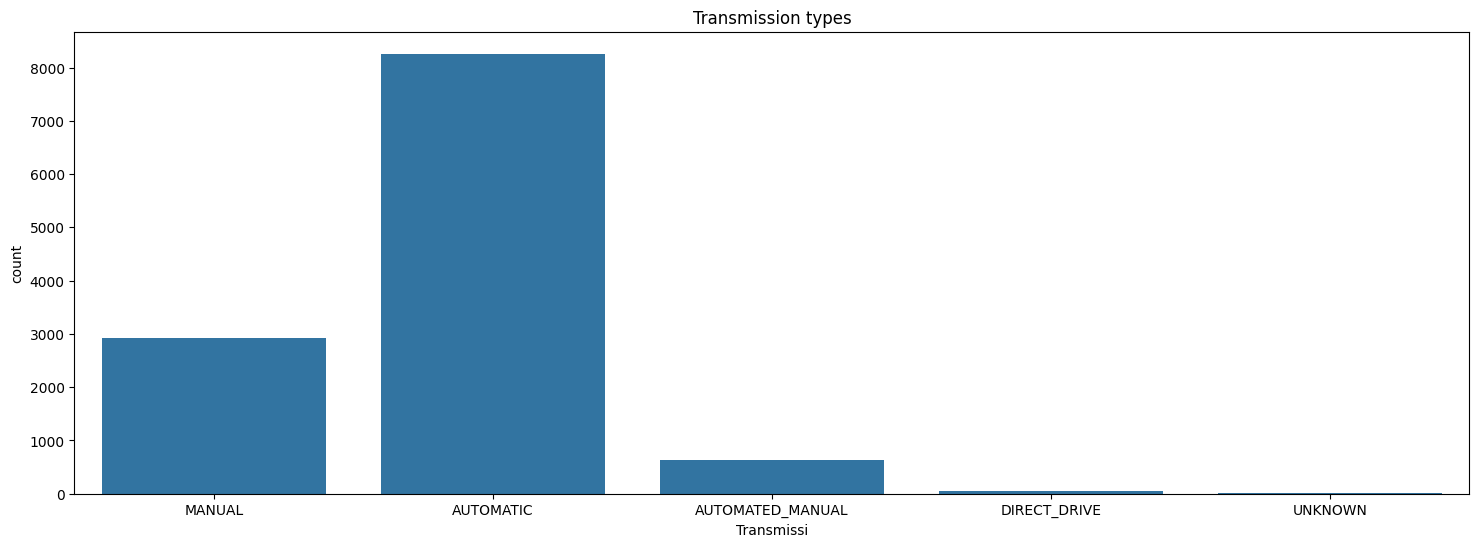

In [24]:
plt.figure(figsize=(18, 6))
sns.countplot(x='Transmissi', data=df)
plt.title('Transmission types')
plt.show()

menghitung jumlah baris dalam DataFrame yang memiliki nilai 'UNKNOWN' pada kolom 'Transmissi'.

In [25]:
df[df['Transmissi'] == 'UNKNOWN'].shape

(19, 14)

memfilter DataFrame, menghapus semua baris yang memiliki nilai 'UNKNOWN' pada kolom 'Transmissi'

In [26]:
df = df[df['Transmissi'] != 'UNKNOWN']

In [27]:
df.shape

(11865, 14)

digunakan untuk menampilkan semua nilai unik yang ada dalam kolom 'BahanBakar'

In [28]:
df['BahanBakar'].unique()

array(['premium unleaded (required)', 'regular unleaded',
       'premium unleaded (recommended)', 'flex-fuel (unleaded/E85)',
       'diesel', 'electric',
       'flex-fuel (premium unleaded recommended/E85)', 'natural gas',
       'flex-fuel (premium unleaded required/E85)',
       'flex-fuel (unleaded/natural gas)'], dtype=object)

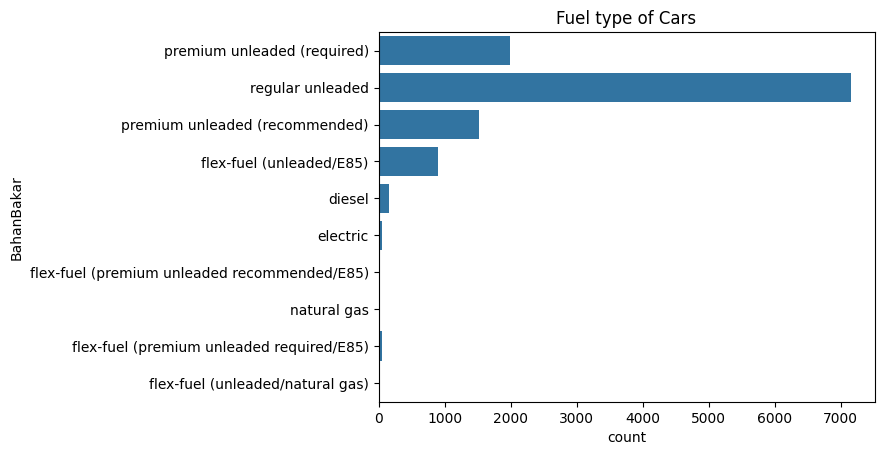

In [29]:
sns.countplot(y='BahanBakar', data=df)
plt.title('Fuel type of Cars')
plt.show()

In [30]:
df['BahanBakar'].value_counts()

BahanBakar
regular unleaded                                7153
premium unleaded (required)                     1992
premium unleaded (recommended)                  1523
flex-fuel (unleaded/E85)                         899
diesel                                           154
electric                                          56
flex-fuel (premium unleaded required/E85)         54
flex-fuel (premium unleaded recommended/E85)      26
flex-fuel (unleaded/natural gas)                   6
natural gas                                        2
Name: count, dtype: int64

<Axes: ylabel='Frequency'>

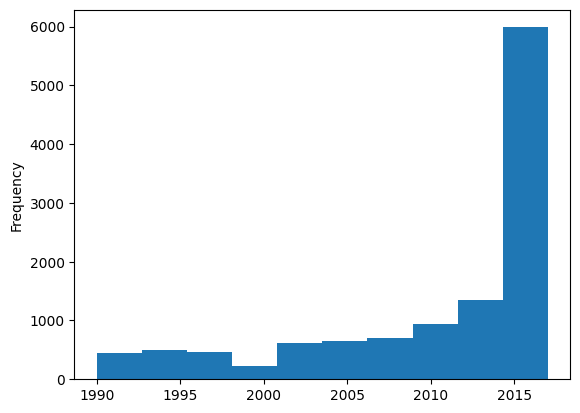

In [31]:
df['Year'].plot(kind='hist')

enghitung frekuensi setiap tipe kopling dalam dataset
Mengurutkan dari yang terbanyak ke tersedikit (ascending=False)
Mengubah hasilnya menjadi DataFrame dengan 2 kolom:
'index': nama tipe kopling
'TipeKopling': jumlah kemunculan

In [32]:
drive_type = df['TipeKopling'].value_counts(ascending=False).reset_index()
drive_type

,TipeKopling,count
0,front wheel drive,4776
1,rear wheel drive,3335
2,all wheel drive,2353
3,four wheel drive,1401


Membuat tabel kontingensi antara kolom Transmissi dan Merk
normalize='columns' mengubah nilai menjadi persentase per kolom (Merk)
*100 mengkonversi desimal ke persentase
Hasilnya menunjukkan persentase tiap jenis transmisi untuk setiap merk mobil

In [33]:
pd.crosstab(df['Transmissi'],df['Merk'],normalize='columns')*100

Merk,Acura,Alfa Romeo,Aston Martin,Audi,BMW,Bentley,Bugatti,Buick,Cadillac,Chevrolet,...,Rolls-Royce,Saab,Scion,Spyker,Subaru,Suzuki,Tesla,Toyota,Volkswagen,Volvo
Transmissi,,,,,,,,,,,,,,,,,,,,,
AUTOMATED_MANUAL,8.333333,100.0,23.655914,36.890244,5.389222,0.0,100.0,0.0,0.000000,0.000000,...,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.402685,27.329193,0.000000
AUTOMATIC,68.253968,0.0,40.860215,42.682927,76.347305,100.0,0.0,100.0,97.229219,66.458519,...,100.0,54.954955,55.0,0.0,62.890625,62.678063,0.0,82.684564,37.515528,85.053381
DIRECT_DRIVE,0.000000,0.0,0.000000,0.000000,1.197605,0.0,0.0,0.0,0.000000,0.713649,...,0.0,0.000000,0.0,0.0,0.000000,0.000000,100.0,0.268456,0.000000,0.000000
MANUAL,23.412698,0.0,35.483871,20.426829,17.065868,0.0,0.0,0.0,2.770781,32.827832,...,0.0,45.045045,45.0,100.0,37.109375,37.321937,0.0,16.644295,35.155280,14.946619


Membuat tabel kontingensi antara TipeKopling dan Merk
Menghitung persentase distribusi tipe kopling untuk setiap merk mobil
normalize='columns' mengkonversi nilai menjadi persentase per kolom/merk

In [34]:
pd.crosstab(df['TipeKopling'],df['Merk'],normalize='columns')*100

Merk,Acura,Alfa Romeo,Aston Martin,Audi,BMW,Bentley,Bugatti,Buick,Cadillac,Chevrolet,...,Rolls-Royce,Saab,Scion,Spyker,Subaru,Suzuki,Tesla,Toyota,Volkswagen,Volvo
TipeKopling,,,,,,,,,,,,,,,,,,,,,
all wheel drive,27.380952,0.0,0.0,77.439024,43.113772,64.864865,100.0,23.979592,30.730479,4.549509,...,0.0,30.630631,0.0,0.0,86.328125,15.384615,61.111111,9.798658,8.322981,35.587189
four wheel drive,1.587302,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,9.068010,23.104371,...,0.0,0.000000,0.0,0.0,3.515625,17.378917,0.000000,25.771812,0.248447,0.000000
front wheel drive,69.444444,0.0,0.0,22.560976,0.299401,0.000000,0.0,69.387755,16.876574,34.076717,...,0.0,69.369369,80.0,0.0,5.468750,50.427350,0.000000,42.281879,90.310559,45.907473
rear wheel drive,1.587302,100.0,100.0,0.000000,56.586826,35.135135,0.0,6.632653,43.324937,38.269402,...,100.0,0.000000,20.0,100.0,4.687500,16.809117,38.888889,22.147651,1.118012,18.505338


DataFrame yang menunjukkan 10 merk mobil dengan tenaga mesin tertinggi

In [35]:
top_hp = df.groupby('Merk')['Tenaga'].max().sort_values(ascending=False).reset_index().head(10)
top_hp

,Merk,Tenaga
0,Bugatti,1001.0
1,Lamborghini,750.0
2,Ferrari,731.0
3,Dodge,707.0
4,Ford,662.0
5,Chevrolet,650.0
6,McLaren,641.0
7,Mercedes-Benz,641.0
8,Cadillac,640.0
9,Maybach,631.0


membuat visualisasi bar chart untuk menampilkan 10 merk mobil dengan tenaga mesin tertinggi

C:\Users\ccoos\AppData\Local\Temp\ipykernel_24440\2320069666.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  fig = sns.barplot(x='Merk', y = 'Tenaga', data=top_hp, palette = 'coolwarm')


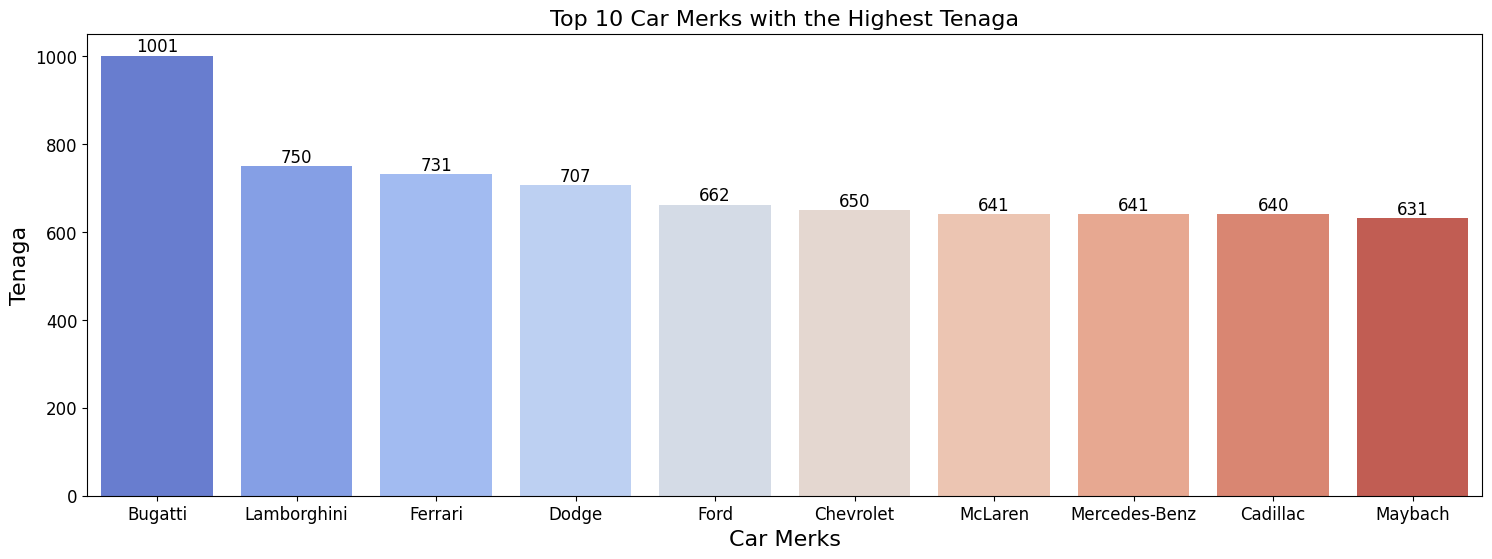

In [36]:
plt.figure(figsize=(18, 6))
fig = sns.barplot(x='Merk', y = 'Tenaga', data=top_hp, palette = 'coolwarm')
plt.title('Top 10 Car Merks with the Highest Tenaga', fontsize = 16)
plt.xlabel('Car Merks', fontsize = 16)
plt.ylabel('Tenaga', fontsize = 16)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)

for i in fig.containers:
    fig.bar_label(i, fontsize = 12)
    
    
plt.show()

In [37]:
fc = df.groupby(['BahanBakar'])['Silinder'].count().sort_values(ascending=False).reset_index()
fc

,BahanBakar,Silinder
0,regular unleaded,7153
1,premium unleaded (required),1992
2,premium unleaded (recommended),1523
3,flex-fuel (unleaded/E85),899
4,diesel,154
5,electric,56
6,flex-fuel (premium unleaded required/E85),54
7,flex-fuel (premium unleaded recommended/E85),26
8,flex-fuel (unleaded/natural gas),6
9,natural gas,2


<Axes: xlabel='Silinder', ylabel='BahanBakar'>

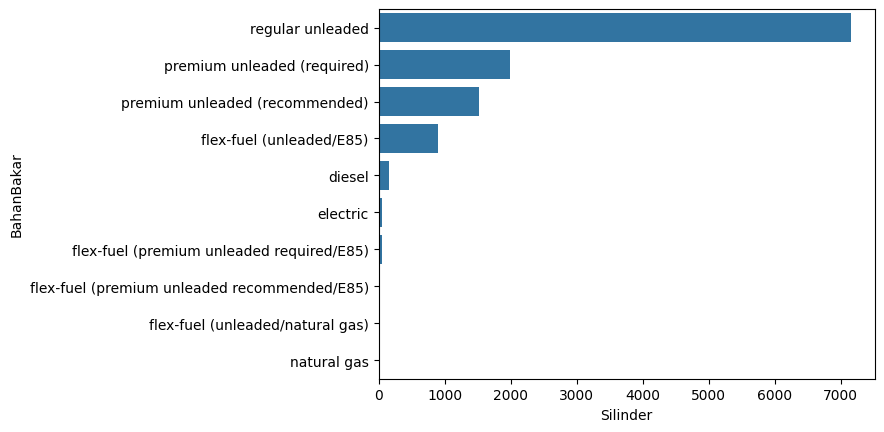

In [38]:
sns.barplot(y = 'BahanBakar', x='Silinder', data = fc)

In [39]:
top_brands = df.groupby('Merk')['Popularity'].sum().reset_index().sort_values(by='Popularity', ascending=False).head(10)
top_brands

,Merk,Popularity
14,Ford,4983817
9,Chevrolet,1552585
45,Toyota,1513095
4,BMW,1307944
11,Dodge,1143918
33,Nissan,1121022
3,Audi,1018440
18,Honda,988698
46,Volkswagen,702765
8,Cadillac,644728


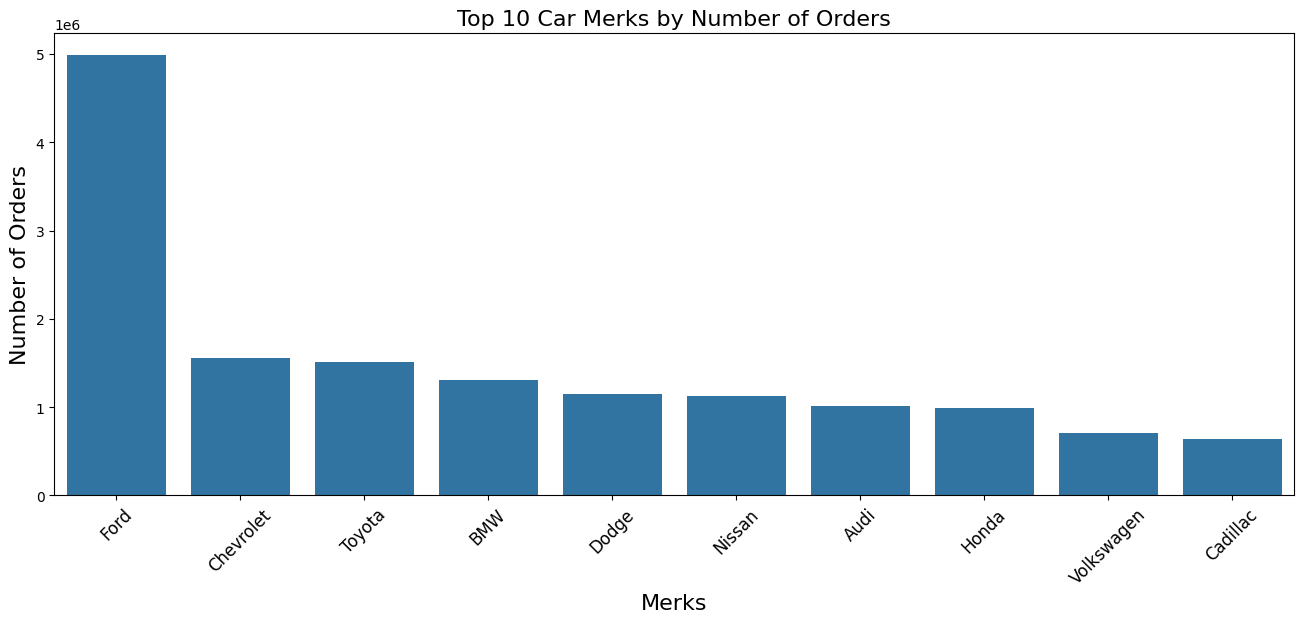

In [40]:
plt.figure(figsize=(16, 6))
plt.xticks(rotation=45, fontsize=12)

fig = sns.barplot(data = top_brands, x='Merk', y= 'Popularity')
plt.xlabel('Merks', size=16)
plt.ylabel('Number of Orders', size=16)
plt.title('Top 10 Car Merks by Number of Orders', size=16)
plt.show()

In [41]:
top_price = df.groupby('Merk')['Harga'].mean().sort_values(ascending=False).reset_index().head(10)
top_price

,Merk,Harga
0,Bugatti,1.757224e+06
1,Maybach,5.462219e+05
2,Rolls-Royce,3.511306e+05
3,Lamborghini,3.315673e+05
4,Bentley,2.471693e+05
5,McLaren,2.398050e+05
6,Ferrari,2.382188e+05
7,Spyker,2.133233e+05
8,Aston Martin,1.979104e+05
9,Maserati,1.142077e+05


In [42]:
top_Merks = df.groupby('Merk')['Popularity'].sum().reset_index().sort_values(by='Popularity', ascending=False).head(10)
top_Merks

,Merk,Popularity
14,Ford,4983817
9,Chevrolet,1552585
45,Toyota,1513095
4,BMW,1307944
11,Dodge,1143918
33,Nissan,1121022
3,Audi,1018440
18,Honda,988698
46,Volkswagen,702765
8,Cadillac,644728


In [43]:
top_Merks = df.groupby(['Year', 'Merk'])['Popularity'].sum().reset_index().sort_values(by='Popularity', ascending=False).head(10)
top_Merks

,Year,Merk,Popularity
714,2017,Ford,922091
681,2016,Ford,899463
645,2015,Ford,780666
636,2015,BMW,403348
702,2016,Toyota,387921
673,2016,BMW,364188
732,2017,Toyota,353394
666,2015,Toyota,347301
707,2017,BMW,309364
660,2015,Nissan,307377


In [44]:
pd.crosstab(df['BahanBakar'],df['Merk'],normalize='columns')*100

Merk,Acura,Alfa Romeo,Aston Martin,Audi,BMW,Bentley,Bugatti,Buick,Cadillac,Chevrolet,...,Rolls-Royce,Saab,Scion,Spyker,Subaru,Suzuki,Tesla,Toyota,Volkswagen,Volvo
BahanBakar,,,,,,,,,,,,,,,,,,,,,
diesel,0.000000,0.0,0.0,8.536585,5.988024,0.000000,0.0,0.000000,0.000000,0.089206,...,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,8.571429,0.000000
electric,0.000000,0.0,0.0,0.000000,1.197605,0.000000,0.0,0.000000,0.000000,0.535236,...,0.0,0.000000,0.0,0.0,0.000000,0.0,100.0,0.268456,0.000000,0.000000
flex-fuel (premium unleaded recommended/E85),0.000000,0.0,0.0,1.524390,0.000000,0.000000,0.0,0.000000,2.267003,0.000000,...,0.0,10.810811,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000
flex-fuel (premium unleaded required/E85),0.000000,0.0,0.0,0.000000,0.000000,32.432432,0.0,0.000000,0.000000,0.000000,...,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000
flex-fuel (unleaded/E85),0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,18.877551,11.586902,22.390723,...,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,8.724832,0.869565,0.000000
flex-fuel (unleaded/natural gas),0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.535236,...,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000
natural gas,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000
premium unleaded (recommended),57.936508,0.0,0.0,28.658537,8.083832,0.000000,0.0,14.795918,27.959698,7.582516,...,0.0,44.144144,0.0,0.0,5.859375,0.0,0.0,0.268456,47.080745,13.879004
premium unleaded (required),17.063492,100.0,100.0,45.426829,81.736527,67.567568,100.0,1.530612,10.579345,2.854594,...,100.0,6.306306,20.0,100.0,33.203125,0.0,0.0,1.342282,3.602484,1.779359


menunjukkan tren harga mobil dari tahun ke tahun

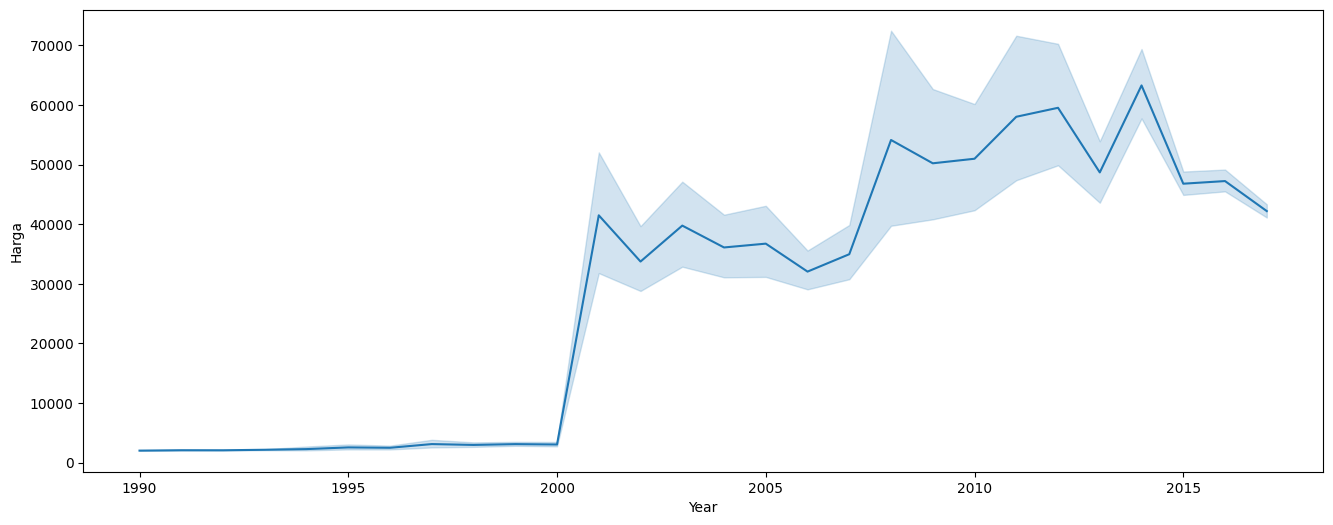

In [45]:
plt.figure(figsize=(16, 6))
sns.lineplot(x='Year',y='Harga',data=df)
plt.show()

membuat tabel pivot untuk menampilkan rata-rata harga mobil berdasarkan jenis bahan bakar

In [46]:
df.pivot_table(values='Harga', index='BahanBakar', aggfunc='mean').sort_values(by='Harga', ascending=False)

,Harga
BahanBakar,
flex-fuel (premium unleaded required/E85),159429.351852
premium unleaded (required),102240.693273
electric,50615.089286
flex-fuel (premium unleaded recommended/E85),48641.923077
premium unleaded (recommended),40812.831254
diesel,40788.000000
flex-fuel (unleaded/natural gas),39194.166667
flex-fuel (unleaded/E85),36258.260289
natural gas,28065.000000


In [47]:
df.pivot_table(values='Harga', index='BesarKendaraan', aggfunc='mean').sort_values(by='Harga', ascending=False)

,Harga
BesarKendaraan,
Large,54040.418924
Midsize,39071.670254
Compact,34354.904842


In [48]:
df.pivot_table(values='Harga', index='BesarKendaraan', aggfunc='mean').sort_values(by='Harga', ascending=False)

,Harga
BesarKendaraan,
Large,54040.418924
Midsize,39071.670254
Compact,34354.904842


In [49]:
df.groupby(['Merk', 'Tenaga'])['Harga'].mean().sort_values(ascending=False)

Merk         Tenaga
Bugatti      1001.0    1.757224e+06
Lamborghini  650.0     1.500000e+06
Maybach      620.0     7.545083e+05
Ferrari      660.0     6.433300e+05
Lamborghini  720.0     5.232250e+05
                           ...     
Oldsmobile   180.0     2.000000e+03
Ford         96.0      2.000000e+03
Oldsmobile   225.0     2.000000e+03
Ford         63.0      2.000000e+03
Pontiac      74.0      2.000000e+03
Name: Harga, Length: 1154, dtype: float64

tabel pivot untuk menampilkan rata-rata harga mobil berdasarkan jenis transmisi

In [50]:
pivot_drive_type_price = df.pivot_table(values='Harga', index='Transmissi', aggfunc='mean')
print(pivot_drive_type_price.sort_values(by='Harga', ascending=False))

                         Harga
Transmissi                    
AUTOMATED_MANUAL  99508.370607
DIRECT_DRIVE      49829.137931
AUTOMATIC         41120.244218
MANUAL            26671.396988


In [51]:
pd.crosstab(df['Transmissi'], df['Merk'], normalize = 'columns')*100

Merk,Acura,Alfa Romeo,Aston Martin,Audi,BMW,Bentley,Bugatti,Buick,Cadillac,Chevrolet,...,Rolls-Royce,Saab,Scion,Spyker,Subaru,Suzuki,Tesla,Toyota,Volkswagen,Volvo
Transmissi,,,,,,,,,,,,,,,,,,,,,
AUTOMATED_MANUAL,8.333333,100.0,23.655914,36.890244,5.389222,0.0,100.0,0.0,0.000000,0.000000,...,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.402685,27.329193,0.000000
AUTOMATIC,68.253968,0.0,40.860215,42.682927,76.347305,100.0,0.0,100.0,97.229219,66.458519,...,100.0,54.954955,55.0,0.0,62.890625,62.678063,0.0,82.684564,37.515528,85.053381
DIRECT_DRIVE,0.000000,0.0,0.000000,0.000000,1.197605,0.0,0.0,0.0,0.000000,0.713649,...,0.0,0.000000,0.0,0.0,0.000000,0.000000,100.0,0.268456,0.000000,0.000000
MANUAL,23.412698,0.0,35.483871,20.426829,17.065868,0.0,0.0,0.0,2.770781,32.827832,...,0.0,45.045045,45.0,100.0,37.109375,37.321937,0.0,16.644295,35.155280,14.946619


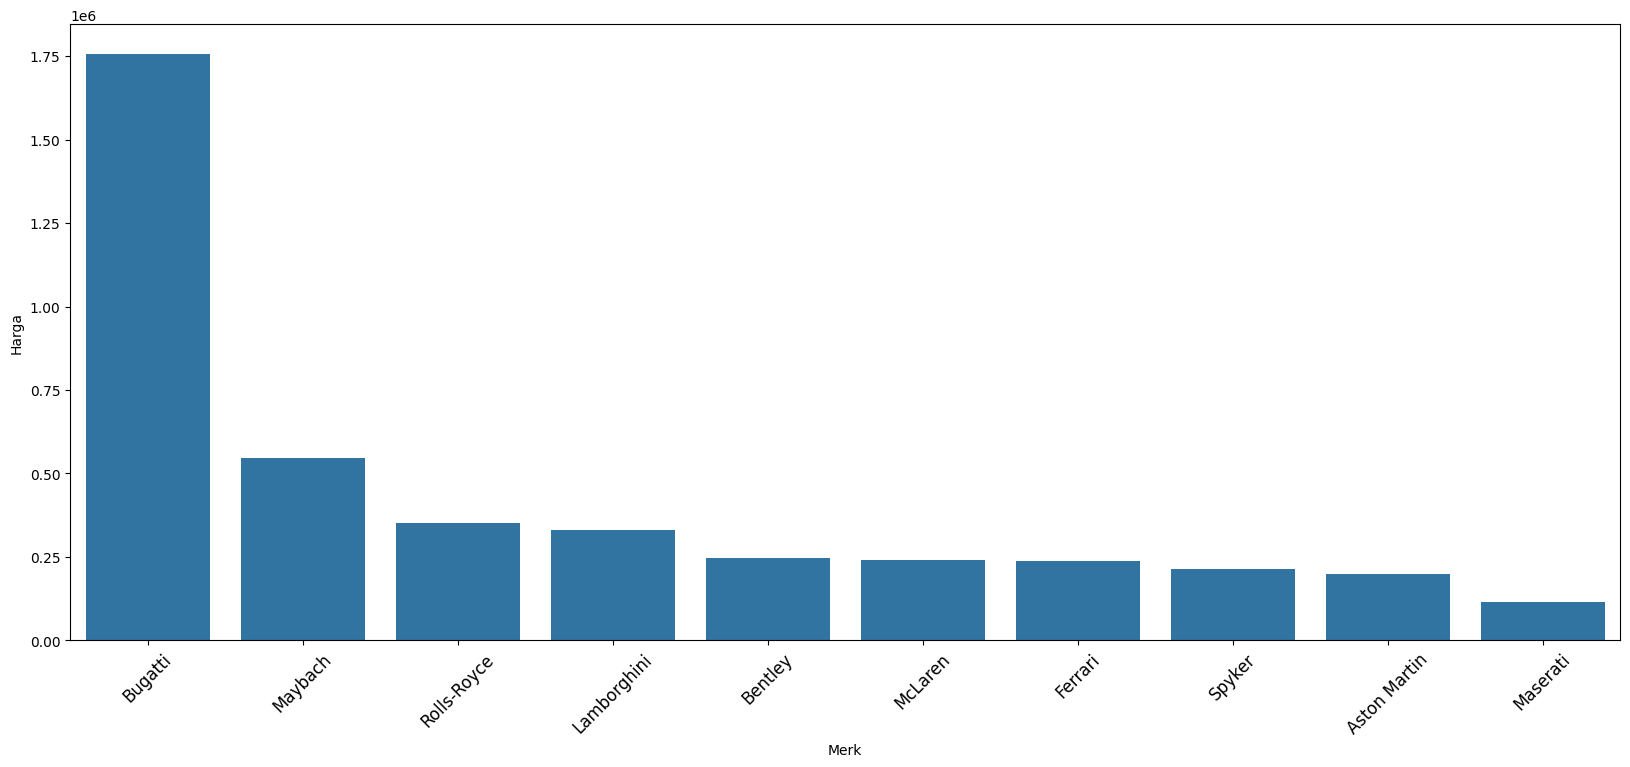

In [52]:
plt.figure(figsize=(20, 8))
plt.xticks(rotation=45, fontsize=12)
sns.barplot(x='Merk',y='Harga',data=top_price)
plt.show()

In [53]:
for column in df.select_dtypes(include=[np.number]).columns:
    df[column].fillna(df[column].median(), inplace=True)

for column in df.select_dtypes(include=[object]).columns:
    df[column].fillna(df[column].mode()[0], inplace=True)

C:\Users\ccoos\AppData\Local\Temp\ipykernel_24440\1034003592.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(df[column].median(), inplace=True)
C:\Users\ccoos\AppData\Local\Temp\ipykernel_24440\1034003592.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For

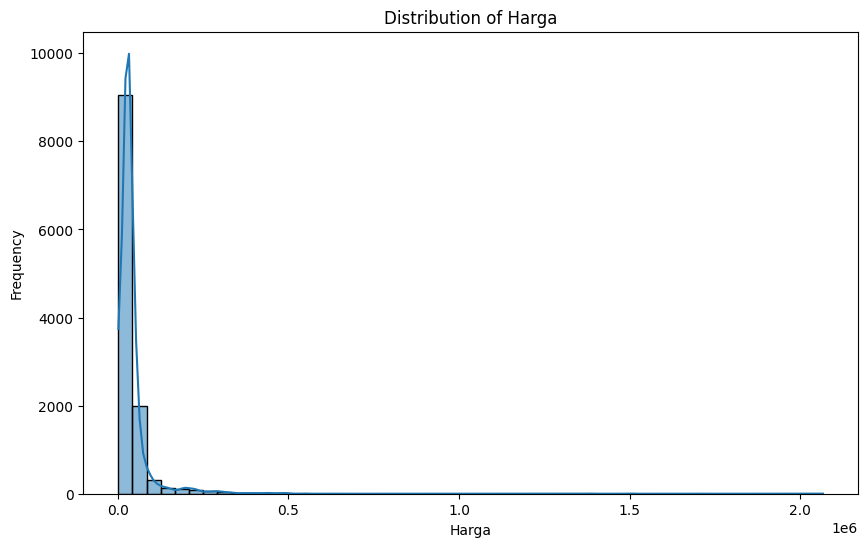

In [54]:
#Distribusi Harga
plt.figure(figsize=(10, 6))
sns.histplot(df['Harga'], bins=50, kde=True)
plt.title('Distribution of Harga')
plt.xlabel('Harga')
plt.ylabel('Frequency')
plt.show()

Korelasi kuat positif (mendekati 1)
Korelasi kuat negatif (mendekati -1)
Variabel yang tidak berkorelasi (mendekati 0)

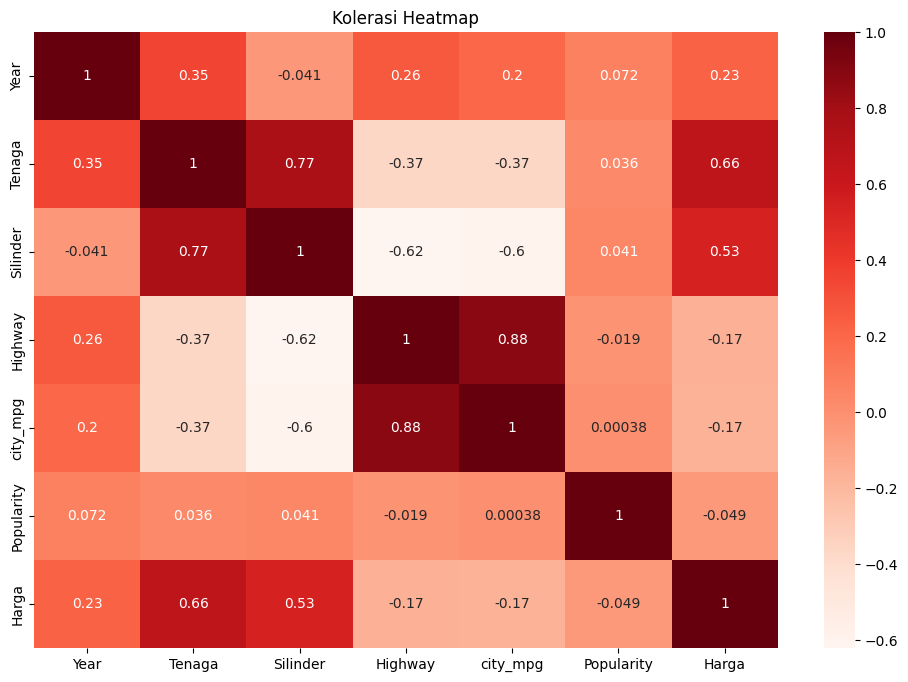

In [55]:
# Correlation heatmap
numeric_df = df.select_dtypes(include=[np.number])
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='Reds')
plt.title('Kolerasi Heatmap')
plt.show()

## Predictive Modeling
mempersiapkan data untuk pemodelan prediktif
X: Variabel independen (fitur) yang dipilih untuk memprediksi harga.
y: Variabel dependen (target) yang ingin diprediksi, yaitu harga.

In [56]:
# Prepare the data for modeling
X = df[['Tenaga', 'Silinder', 'Highway', 'city_mpg', 'Popularity']]
y = df['Harga']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train: fitur-fitur dari data training.
y_train: target (harga) dari data training.

In [57]:
# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

MSE mengukur rata-rata kuadrat perbedaan antara prediksi dan nilai aktual.
Nilai yang lebih rendah menunjukkan performa yang lebih baik.
Skala MSE tergantung pada skala variabel target (harga dalam kasus ini).

R² mengukur proporsi variasi dalam variabel dependen yang dapat dijelaskan oleh model.
Nilainya berkisar antara 0 dan 1.
Semakin mendekati 1, semakin baik model dalam menjelaskan variabilitas data.

In [58]:
# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mse, r2

(1735281445.8372939, 0.49736855569146154)

Jika R² mendekati 1, model Anda menjelaskan sebagian besar variabilitas dalam harga mobil.
Jika R² rendah (misalnya < 0.5), banyak variabilitas yang tidak dijelaskan oleh model.

In [59]:
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mse, r2

(1735281445.8372939, 0.49736855569146154)

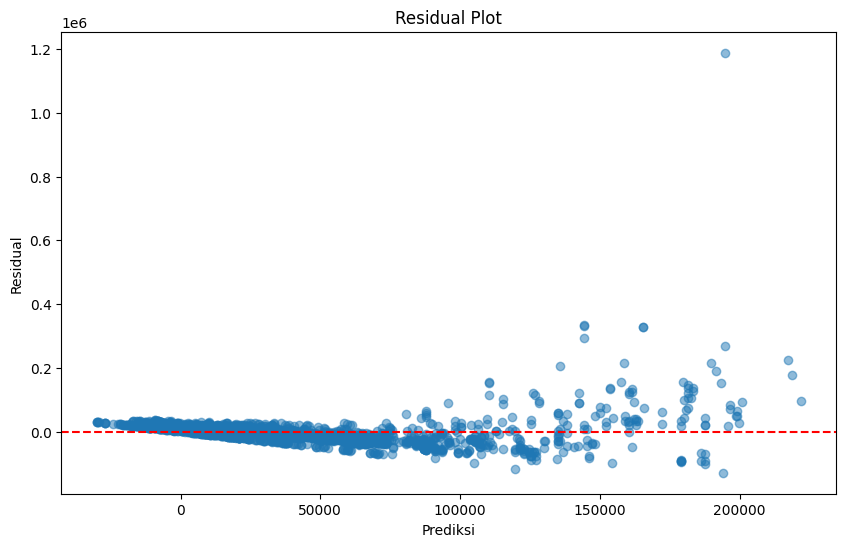

In [60]:
residuals = y_test - y_pred
plt.figure(figsize=(10,6))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Prediksi')
plt.ylabel('Residual')
plt.title('Residual Plot')
plt.show()

In [61]:
coef_df = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_})
coef_df = coef_df.sort_values('Coefficient', key=abs, ascending=False)
print(coef_df)

      Feature  Coefficient
1    Silinder  6927.322554
2     Highway   670.377405
3    city_mpg   555.545496
0      Tenaga   317.738228
4  Popularity    -3.161339


In [62]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, X, y, cv=5, scoring='r2')
print(f"Cross-validation scores: {scores}")
print(f"Mean R-squared: {scores.mean()}")

Cross-validation scores: [0.54029902 0.54602862 0.45225014 0.38738158 0.35361405]
Mean R-squared: 0.45591468242754496
